### ideia para roteiro:

- breve introdução sobre a problemática de distribuição das sementes nas plantas
- explicar sobre o problema de otimização que elas enfrentam (melhor forma de organizar sementes numa espiral, como distribuir folhas para maior contato com luz solar)
- como modelar matematicamente uma espiral (e anotação utilizada para isso) e criar uma visualização no matplotlib interativa para mostrar diferentes ângulos (se possível, desenhar os braços das espirais, explicação sobre utilização de ângulos irracionais, fraçoes contínuas e sua relação com espirais
  - visualização interativa espirais (mateus)
  - frações continuas interativas (mateo)
  - animação manim distribução folhas como no começo do vídeo (mateus)
- reflexões finais e alguma coisa doida (gênero...) (mateo)

#Plantas, espirais e matemática: um modelo matemático para entender a problemática da distribuição das sementes e um reflexão "estranha"

## Realizado por: Mateus Krase e Mateo Pinillos-Zapata

- Público alvo: Estudantes de ensino medio

- Objetivo da proposta: Realizar um notebook interativo que apresente o contexto da distrubiução das sementes e folhas das plantas mediante o modelo matemático das espirais para mobilizar algumas reflexões queer (estranhas) sobre a matemática e su aplicação na interpretação das problemáticas da natureza.

- Tópico a ensinar: Divulgação sobre como a matemática pode ajudar a compreender alguns comportamentos biologicos, mediante o modelo dos espirais e as frações contínuas.


In [15]:
# bibliotecas necessárias
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import matplotlib.image as mpimg

# módulo para animação
import matplotlib.animation as animation

# módulo para manim
from manim import *

%matplotlib inline
plt.rcParams["animation.html"] = "jshtml"


import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation


### Quais são os retos que tem que superar as plantas pra conseguir sobreviver?

Assim como o conhecimento matemático parte de problemáticas para desenvolver conceitos; as plantas tem diversas problemáticas a resolver na sua existência para conseguir sobreviver, e tem adoptado, por seleção natural, no seu DNA, soluções práticas para afrontar essas problemáticas.

Uma dessas problemáticas tem a ver com a distribuição das suas folhas e sementes para que todas consigam receber a luz e a agua que precisam para realizar o processo de fotosíntese. Imagina só uma planta que tenha as folhas distribuidas do seguinte jeito: [insertar foto com uma planta com as folhas todas apiladas]


In [ ]:
#Código com a foto das folhas apiladas

Mas, qual será que é a melhor disposição para que todas as folhas recebam a luz e agua que precisam? Move o deslizador para explorar as diferentes configurações de folhas que pode ter uma planta. Quais são as condições que você acha que deve cumprir a disposição das folhas para ser considerada uma disposição "boa" para a problemática do recebimento de luz e agua?

In [7]:
# calcula distância entre os pontos
def distancia(d):
    return np.sqrt(d)

# calcula os intervalos de r de forma suave utilizando função seno
def r_animacao(r_ini, r_fim, frames, j):
    return r_ini + 0.5*(r_fim - r_ini)*(1 + np.sin(np.pi*(j/(frames-1)-0.5)))

In [8]:
# imagem da folha (obrigatoriamente em png)
leaf_img = mpimg.imread("folha.png")

# Spiral and animation settings
n = 20                      # numero de folhas
frames = 60                 # quantidade de frames
r_ini, r_fim = 0.3, 0.618   # valores iniciais e finais de r

# gera os pontos da espiral para guiar o desenho das folhas
def gerar_pontos(r, n):
    coords = []
    for i in range(n):
        d = distancia(i)
        theta = 2 * np.pi * r * i
        x = d * np.cos(theta)
        y = d * np.sin(theta)
        coords.append((x, y, theta, d))
    return coords

# detalhes da figura
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.axis('off')
limit = distancia(n+1) * 1.2
ax.set_xlim(-limit, limit)
ax.set_ylim(-limit, limit)

# configura parâmetros para o objeto de imagem das folhas
leaf_artists = []
for _ in range(n):
    im = ax.imshow(leaf_img, extent=[-0.5, 0.5, 0, 1], zorder=2)  # normalized size
    leaf_artists.append(im)
    

# calcula uma nova imagem dependendo do ângulo da espiral (cada frame)
def update(frame):
    r = r_animacao(r_ini, r_fim, frames, frame)
    coords = gerar_pontos(r, n)

    # percorre todas as folhas, do ponto final até o ponto inicial
    for i, im in zip(range(n-1, -1, -1), leaf_artists):
        x, y, angle, length = coords[i]

        # cria transformação afim da imagem, aplicando rotação, escala e translação
        trans = Affine2D()
        trans.scale(length, length)
        trans.rotate(angle)
        trans.translate(0, 0)
        trans2 = trans + ax.transData

        im.set_transform(trans2)
        im.set_alpha(1.0)

    return leaf_artists

ani = animation.FuncAnimation(fig, update, frames=frames, interval=200, blit=True)
plt.close()
ani


Essas e outras perguntas, foram as que alguns matemáticos/as se fizeram para tentar compreender por que as plantas tem essa forma tão particular de distriubuir suas folhas e sementes, porque, certamente, se as plantas seguem aqui é porque já solucionaram o problema, não é?

### A abordagem dos (ou das?) matemáticos/as na interpretação da solução feita pelas plantas


Os/as/es Matemáticos/as/es são profissionais que costumam analizar problemáticas da realidade com conceitos simples que tem sido bem estudados é aprofundados na matemática; entre esses conceitos: diferentes tipos de números (naturais, enteros, racionais, reais, complexos), conceitos geométricos básicos (pontos, retas, círculos, polígonos, entre outros...) e relações entre conjuntos (principalmente funções).

Tendo tudo isso em conta, a abordagem dos matemáticos foi a seguinte: analizar espirais.


In [ ]:
#foto ou animação sobre plantas e espirais

As espirais são faceis de analizar desde o seguinte razonamento:

Vamos definir uma espiral como um conjunto de puntos que podem se graficar no plano, com uma unidade de diferença um do outro, e rotando em um ángulo $ \alpha$, em sentido antihorário, o ponto inicial do ponto seguinte, e assim sucesivamente. Essa figura aqui é um exemplo de graficar 100 pontos, com uma unidade de diferença, e com um ángulo $\alpha ≈ 101,42°$

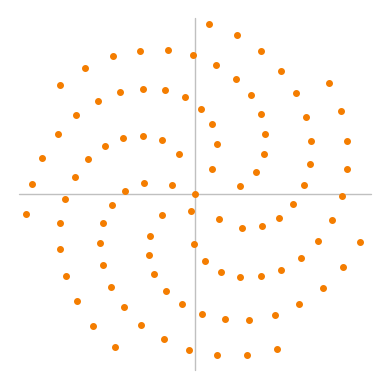

In [11]:
def dibujar_espiral(n, r):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    size = distancia(n+1)

    # Dibujar ejes
    plt.plot([-size,size], [0,0], linewidth=1, color='#C0C0C0', solid_capstyle='round')
    plt.plot([0,0], [-size,size], linewidth=1, color='#C0C0C0', solid_capstyle='round')

    lx = []
    ly = []
    for k in range(0, n + 1):
        # Dibujar puntos
        x = distancia(k) * np.cos(2 * np.pi * r * k)
        y = distancia(k) * np.sin(2 * np.pi * r * k)

        lx.append(x)
        ly.append(y)

        # Añadir un letrero con el número en cada punto
        # plt.text(x + 0.2, y + 0.2, str(k), fontsize=6, ha='right', va='bottom')

    plt.plot(lx, ly, '.', markersize=8, c='#f47d00')
    plt.xlim([-size*1.05, size*1.05])
    plt.ylim([-size*1.05, size*1.05])
    plt.axis('off')
    ax.set_aspect('equal')

    plt.show()
    plt.close()

# Ejemplo
dibujar_espiral(100, np.e-2)

  Mas, essas espirais não sempre tem esse comportamento, vamos ver o que acontece com um ángulo $\alpha = 45°$

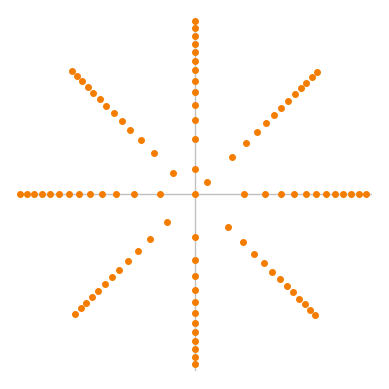

In [14]:
dibujar_espiral(100, 1/8)

Não parece ter forma de espiral, não é? Para simplificar um pouco os cálculos, vamos mudar nosso sistema de medida de ángulos, de graus a voltas, tendo em conta que $1 \ Volta = 360°$, desse jeito, $45° = \frac{1}{8} \ Volta $. Utiliza diferentes frações de volta para graficar os pontos e descreve o que acontece com as espirais

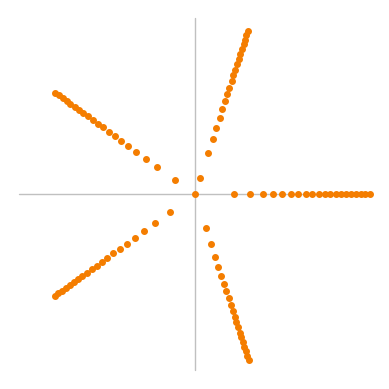

In [ ]:
dibujar_espiral(100, 2/10)

Parece que só utilizando números racionais em nossas espirais somente conseguimos ter as sementes apiladas em uns cuantos "braços" da espiral. Mas, será que tem números que não podem ser representados como uma fração? Tem sim! Os números irracionais tais como: $\pi, e, \sqrt{2}, \sqrt{3}$, entre otros... Coloca os decimais desses números (que também são irracionais), restando a parte inteira do número, como ángulo da espiral (por exemplo, se vamos colocar $\pi = 3,14159... $, colocamos $\pi - 3 = 0,14159...$), e descreve o que acontece

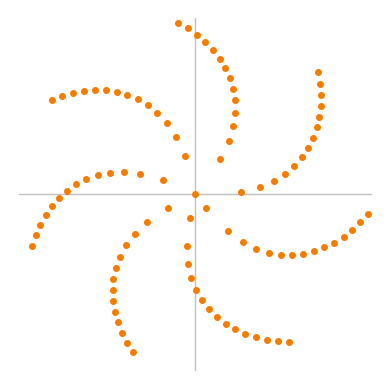

In [ ]:
dibujar_espiral(100, 3- np.pi)

Parece que começamos a enxergar espirais circulares quando utilizamos aproximações a números irracionais. São aproximações porque as computadoras não conseguem calcular todos os decimais dos números irracionais, porque são infinitos! Retomando com nosso problema inicial, ainda assim, tendo espirais, precisamos de uma configuração que aproveite melhor o espaço e distribua as sementes da forma mais espalhada y com igual espaço entre as sementes possivel. Move o deslizador e anota quais são os ángulos que melhor distribuem as sementes segundo você. Explica tuas escolhas.

In [6]:
n = 200         # número de pontos
frames = 60     # quantidade de frames
r_ini = 0.0     # valor inicial de r
r_fim = 0.5     # valor final de r

fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.axis('off')
size = distancia(n+1)

ax.set_xlim([-size*1.05, size*1.05])
ax.set_ylim([-size*1.05, size*1.05])

scat, = ax.plot([], [], '.', markersize=4, c='blue')
param_text = ax.text(0.01, 0.99, '', transform=ax.transAxes, fontsize=12, color='black', ha='left', va='top') # texto para mostrar o valor de r

# como os pontos são calculados
def update(frame):
    r = r_animacao(r_ini, r_fim, frames, frame)
    lx = [distancia(i)*np.cos(2*np.pi*r*i) for i in range(n)]
    ly = [distancia(i)*np.sin(2*np.pi*r*i) for i in range(n)]
    scat.set_data(lx, ly)
    param_text.set_text(f"r = {r:.3f}")
    return scat, param_text

ani = animation.FuncAnimation(fig, update, frames=frames, interval=200, blit=True)
plt.close()
ani

Uma boa pergunta que se fizeram os/as matemáticos/as foi: quais são as características que deve ter o número irracional que descreva o ángulo de distribuição das sementes? Com certeza, você conseguiu analisar que quando utilizamos números racionais para descrever o ángulo, a espiral ficava com o número de braços do denominador da fração. Note que, se graficamos a espiral com um ángulo com os decimais de $\pi$, podem se contar 7 braços, similar à gráfica da espiral com um ángulo de $\frac{1}{7}$. [insertar imagem de 1/7 e pi]

Mas não é à toa que isso aconteça, já que $\frac{1}{7} = 0,1428...$, e pode se observar que os primeiros dois decimais são idénticos com os primeiros dois decimais de $\pi = 3,1415...$

Um raçocínio similar, foi o que levou aos/às matemáticos/as a considerar que era importante analisar as frações que se aproximavam mais aos números irracionais. Desse jeito, o conceito do análise das frações contínuas serviu para esse fim.

[Explicação ou animação frações contínuas]


Tendo isso em conta, os coeficientes das frações contínuas acabam determinando o comportamento da espiral, dessa maneira o número $\pi-3$ (só a parte decimal), expressado com a seguinte fração contínua: $$ x$$ tem os braços da espiral determinados pelos coeficientes $7$ e $256$, para conseguir enxergar os 256 braços, precisamos de graficar muitos mais pontos.


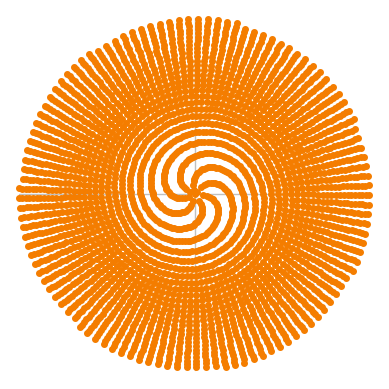

In [ ]:
dibujar_espiral(3000, np.pi - 3)

Desse jeito, poderiamos concluir que a melhor solução para nosso problema, seria achar um número irracional, que tenha como representação uma fração contínua só com coeficientes igual a $1$, assim: $$x$$

Acontece que, essa fração contínua é a representação dos decimais do número $\phi = \frac{1+\sqrt{5}}{2}=1.6180...$, chamado phi. Pela grão quatidade de propiedades especiais que tem este número, também e chamado de número de oro. Vamos enxergar a distribuição das sementes utilizando os decimais deste número:

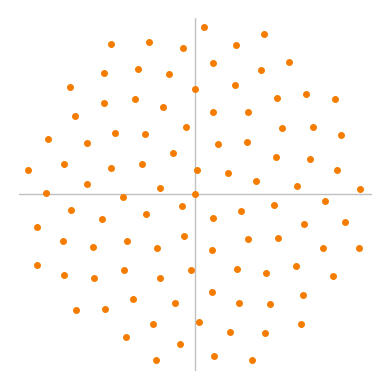

In [ ]:

dibujar_espiral(100, ((1+ np.sqrt(5))/2)-1)

Bonitinho, não é? Então, é desse jeito como a matemática consegue modelar a distribuição das folhas e sementes nas plantas, distribuição que a propia natureza ensinou para a gente que é uma das mais ótimas para a solução desse problema. Os decimais do número $\phi$ (0.6180...) tem como medida em graus, aproximadamente, o ángulo de $222,4922°$ que por propiedades dos ángulos, acava sendo complementário com o ángulo de $360° - 222,4922° = 137,5078°$ ou exatamente, em voltas, sería o ángulo $1-( \phi -1 ) \approx 0,38197$,  que, por efeitos práticos, vamos aproximar a $137,5°$.

Muitos estudos comprovaram que a maior parte das plantas tem como ángulo de distribuição das suas folhas e sementes o ángulo de 137,5°, mas que existem alguns outros ángulos presentes na natureza tais como 99,5°; 77,96°; 64,1° e 151,1°. Converte os ángulos a voltas e justifica se são boas soluções ou não.

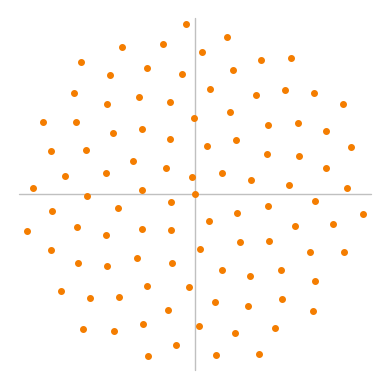

In [ ]:
dibujar_espiral(100, 0.2764)


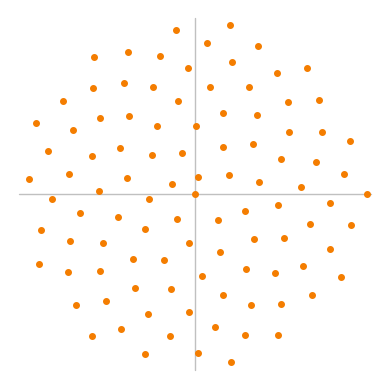

In [ ]:
dibujar_espiral(100, 0.2165)


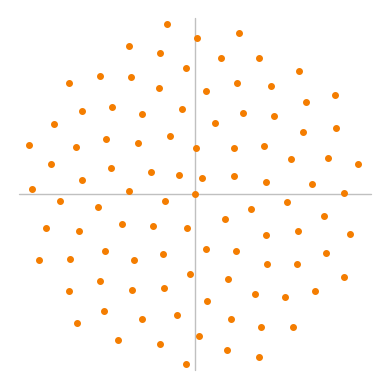

In [ ]:
dibujar_espiral(100, 0.1781)

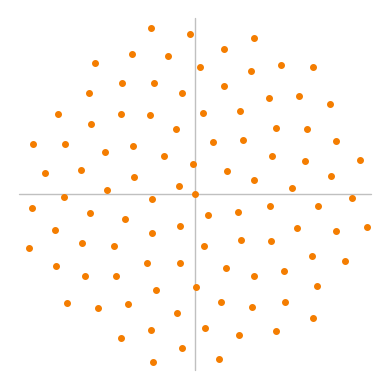

In [ ]:
dibujar_espiral(100, 0.4197)

Vejamos uma animação que mostra de forma simples como o processo funciona:

In [33]:
from manim import *

class CrescimentoFolhas(Scene):
    def construct(self):
        golden_angle = 137.5 * DEGREES
        num_leaves = 5
        radius = 1.8
        center = ORIGIN

        arrows = VGroup()
        leaves = VGroup()

        previous_angle = 0

        # desenha um círculo no centro
        circle = Circle(radius=0.2, color=GREEN, fill_opacity=1)
        self.play(Create(circle))

        for i in range(num_leaves):
            angle = i * golden_angle
            direction = radius * np.array([np.cos(angle), np.sin(angle), 0])

            # definição da seta
            arrow = Arrow(start=center, end=center + direction, buff=0.1, max_tip_length_to_length_ratio=0.15)
            arrow.set_color(GREEN)

            # definição da folha
            folha_svg = SVGMobject("folha-2.svg")
            base_y = min([p[1] for p in folha_svg.get_all_points()])
            base_point = np.array([0, base_y, 0])
            folha_svg.shift(-base_point)

            folha_pos = center + 0.5 * direction
            folha_svg.move_to(folha_pos)
            seta_length = np.linalg.norm(direction)
            folha_svg.scale(0.4 * seta_length)

            folha_svg.rotate(-np.pi / 2, about_point=folha_pos)
            folha_svg.rotate(angle, about_point=folha_pos)

            # definição do arco e do rótulo
            arc = Arc(radius=0.7, start_angle=previous_angle, angle=golden_angle, color=RED)
            angle_label = MathTex("137.5^{\\circ}", color=RED).scale(0.6)
        
            if i > 0:
                angle_label.move_to(arc.point_from_proportion(0.5) + 0.3 * UP) # ajusta a posição do rótulo

                # aplica a escala nas folhas anteriores para simular cescimento
                self.play(
                    circle.animate.scale(1.04, about_point=ORIGIN),
                    leaves.animate.scale(1.04, about_point=ORIGIN),
                    run_time=0.4
                )

                # desenha o arco e o rótulo
                self.play(Create(arc), FadeIn(angle_label))
                self.wait(0.3)

            # desenha a seta
            self.play(GrowArrow(arrow))
            self.wait(0.1)

            # remove o arco e o rótulo (caso não seja a primeira folha)
            if i>0:
                self.play(FadeOut(arc), FadeOut(angle_label), run_time=0.3)

            # desenha a folha
            self.play(GrowFromCenter(folha_svg))
            self.wait(0.2)

            # remove a seta
            self.play(FadeOut(arrow), run_time=0.1)

            # atualiza as listas de setas e folhas
            arrows.add(arrow)
            leaves.add(folha_svg)

            previous_angle = angle
        
        self.wait(3)


%manim -qm -v WARNING --disable_caching CrescimentoFolhas

Manim Community v0.19.0

### Reflexões e considerações finais

Com a leitura da notebook, conseguimos fazer um raçocínio muito parecido com o raçocínio que muitas vezes fazem os/as/es matemáticos/as/es. Chegamos na conclusão, também, de que, se bem existem soluções matemáticas bonitinhas, a natureza também encontra outras soluções nos seus problemas. Também, conseguimos enxergar a importância de conhecer diferentes conjuntos numéricos para achar soluções a nossas problemáticas, neste caso, utilizamos um conjunto numérico (os números irracionais) que algumas pessoas poderiam considerar de "estranho" , já que seus decimais são infinitos e não seguem nenhum padrão.

Ao longo do notebook se utilizaram alguns pronomes neutros e sempre o pronome femenino e masculino, para nos referir às pessoas que trabalham com matemática. Enlaçando as ideias, se as plantas tem toda essa complexidade e são capazes de mexer com modelos que trabalham com números "estranhos", porque em questões como a identificação de gênero só aceitamos o binario homem/mulher como se fosse simplesmente os números 0 e 1? o que acontece com a quantidade infinita de números "estranhos" que há entre 0 e 1?